In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Files to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Clinical Trial Data
mouse_data_df = pd.read_csv('data/clinicaltrial_data.csv')
clinical_data_df = pd.read_csv('data/mouse_drug_data.csv')

# Combine the data into a single dataset
combined_mouse_clinical_df = pd.merge(mouse_data_df, clinical_data_df,
                                       how = 'outer', on = 'Mouse ID')

# Display the data table for preview
combined_mouse_clinical_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_df = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

# Change title


# Preview DataFrame
mean_tumor_volume_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [11]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
#std_error_tumor_volume = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']

# Convert to DataFrame
#std_error_tumor_volume = pd.DataFrame(combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem())

# Preview DataFrame
#std_error_tumor_volume

mean_tumor_volume_df["Volume SEM"] = mean_tumor_volume_df['Tumor Volume (mm3)'].sem()
mean_tumor_volume_df.reset_index(inplace = True)
mean_tumor_volume_df.head()

,index,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,0,Capomulin,0,45.000000,0.898067
1,1,Capomulin,5,44.266086,0.898067
2,2,Capomulin,10,43.084291,0.898067
3,3,Capomulin,15,42.064317,0.898067
4,4,Capomulin,20,40.716325,0.898067


In [8]:
# Minor Data Munging to Re-Format the Mean Tumor Volume Data Frame
mean_tumor_volume_pivot = mean_tumor_volume_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
mean_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
# Minor Data Munging to Re-Format the Std Error Tumor Volume Frame
std_error_tumor_volume_pivot = std_error_tumor_volume.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
std_error_tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


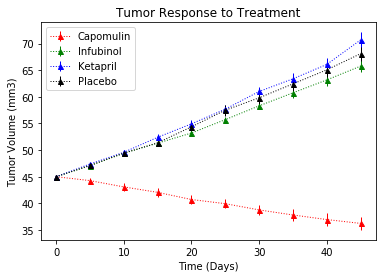

In [21]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot['Capomulin'], yerr=std_error_tumor_volume_pivot['Capomulin'],
             color='r', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot['Infubinol'], yerr=std_error_tumor_volume_pivot['Infubinol'],
             color='g', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot['Ketapril'], yerr=std_error_tumor_volume_pivot['Ketapril'],
             color='b', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_tumor_volume_pivot.index, mean_tumor_volume_pivot['Placebo'], yerr=std_error_tumor_volume_pivot['Placebo'],
             color='black', marker='^', markersize=5, linestyle=':', linewidth=1)

x_lim = len(mean_tumor_volume_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.savefig('tumor_response_scatter.png')
plt.show()


## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_df = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

# Convert to DataFrame
mean_metastatic_df = pd.DataFrame(combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())

# Preview DataFrame
mean_metastatic_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#std_error_metastatic = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites']

# Convert to DataFrame
#std_error_metastatic = pd.DataFrame(combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem())

# Preview DataFrame
#std_error_metastatic.head()

mean_metastatic_df["Metastatic SEM"] = mean_metastatic_df['Metastatic Sites'].sem()
mean_metastatic_df.reset_index(inplace = True)
mean_metastatic_df.head()


,Drug,Timepoint,Metastatic Sites,Metastatic SEM
0,Capomulin,0,0.000000,0.090044
1,Capomulin,5,0.160000,0.090044
2,Capomulin,10,0.320000,0.090044
3,Capomulin,15,0.375000,0.090044
4,Capomulin,20,0.652174,0.090044


In [18]:
# Minor Data Munging to Re-Format the Mean Metastatic Sites
mean_metastatic_df_pivot = mean_metastatic_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
mean_metastatic_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [19]:
# Minor Data Munging to Re-Format the Std Error Metastatic Sites
std_error_metastatic_pivot = std_error_metastatic.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
                                                              
# Preview that Reformatting worked
std_error_metastatic_pivot.head()                                                       

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


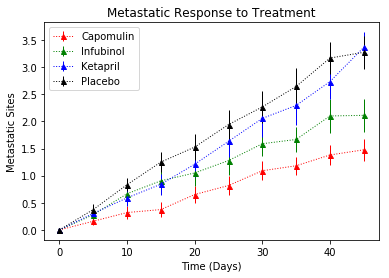

In [20]:
# Generate the Plot (with Error Bars)

plt.errorbar(mean_metastatic_df_pivot.index, mean_metastatic_df_pivot['Capomulin'], yerr=std_error_metastatic_pivot['Capomulin'],
             color='r', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_metastatic_df_pivot.index, mean_metastatic_df_pivot['Infubinol'], yerr=std_error_metastatic_pivot['Infubinol'],
             color='g', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_metastatic_df_pivot.index, mean_metastatic_df_pivot['Ketapril'], yerr=std_error_metastatic_pivot['Ketapril'],
             color='b', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mean_metastatic_df_pivot.index, mean_metastatic_df_pivot['Placebo'], yerr=std_error_metastatic_pivot['Placebo'],
             color='black', marker='^', markersize=5, linestyle=':', linewidth=1)

x_lim = len(mean_metastatic_df_pivot.index)
# Chart title
plt.title("Metastatic Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.savefig('metastatic_response_scatter.png')
plt.show()

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_survival_rate_df = combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Mouse ID']
#mouse_survival_rate_df['Mouse Count'] = mouse_survival_rate_df.apply(['Drug','Timepoint']).count()['Mouse ID']

# Convert to DataFrame
mouse_survival_rate_df = pd.DataFrame(combined_mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())

# Preview DataFrame
mouse_survival_rate_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [23]:
# Minor Data Munging to Re-Format the Data Frames
mouse_survival_rate_df_pivot = mouse_survival_rate_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
mouse_survival_rate_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


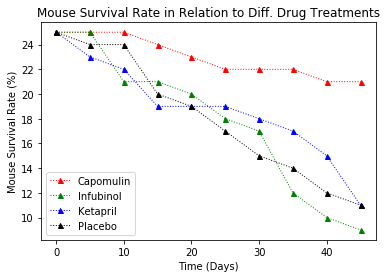

In [24]:
# Generate the Plot (Accounting for percentages)

plt.errorbar(mouse_survival_rate_df_pivot.index, mouse_survival_rate_df_pivot['Capomulin'],
             color='r', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mouse_survival_rate_df_pivot.index, mouse_survival_rate_df_pivot['Infubinol'],
             color='g', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mouse_survival_rate_df_pivot.index, mouse_survival_rate_df_pivot['Ketapril'],
             color='b', marker='^', markersize=5, linestyle=':', linewidth=1)

plt.errorbar(mouse_survival_rate_df_pivot.index, mouse_survival_rate_df_pivot['Placebo'],
             color='black', marker='^', markersize=5, linestyle=':', linewidth=1)

x_lim = len(mouse_survival_rate_df_pivot.index)
# Chart title
plt.title("Mouse Survival Rate in Relation to Diff. Drug Treatments")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Mouse Survival Rate (%)")
# legend 
plt.legend(loc='lower left')
plt.savefig('mouse_survival_rate_scatter.png')
plt.show()

## Summary Bar Graph

In [25]:
# Calculate the percent changes for each drug
tumor_volume_percent_change = (((mean_tumor_volume_pivot.iloc[-1] - mean_tumor_volume_pivot.iloc[0])
                                / mean_tumor_volume_pivot.iloc[0])*100)
# Display the data to confirm
tumor_volume_percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [26]:
# Create tuple to store Drugs 
tumor_volume_percent_change.index
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
drugs

['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

In [27]:
# Create tuple to store Percent Changes
tumor_volume_percent_change.values
percentage_change = [-19.475303, 46.123472, 57.028795, 51.297960]
percentage_change

[-19.475303, 46.123472, 57.028795, 51.29796]

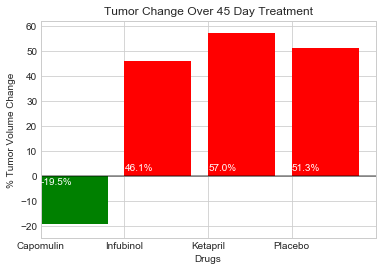

In [37]:
# Splice the data between passing and failing drugs
graph_bar_colors = ['r' if tpc > 0 else 'g' for tpc in percentage_change]
graph_bar_colors

# Orient widths. Add labels, tick marks, etc. 

plt.style.use('seaborn-whitegrid')
x_axis = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
plt.bar(x_axis, percentage_change, color = graph_bar_colors, align="edge")
tick_locations = ([value for value in x_axis])
plt.xticks(drugs)


plt.xlim(0, len(x_axis))
plt.ylim(-25, max(tumor_volume_percent_change.values)+5)
# Put a horizontal line at y=0
plt.hlines(0, -0.1, 10, alpha=0.5)

#count for x coordinate location of value label
count = 0

#loops through tumor change percentage and get % change in each drug's bar
for r in percentage_change:
    if r < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'left', color = 'white')
    count += 1  
    
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

plt.savefig('tumor_percent_change_bar.png')
plt.show()

